# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
data =pd.read_csv("crash_data_queensland_for_analysis.csv")

In [3]:
data.head(3)

,Year,Police_Region,Severity,Drink_Driving,Driver_Speed,Fatigued_Driver,Defective_Vehicle,Count_Crashes,Count_Fatality,Count_Hospitalised,Count_Medically_Treated,Count_Minor_Injury
0,2001,Brisbane,Fatal,No,No,No,No,25,25,6,4,2.0
1,2001,Brisbane,Fatal,No,No,No,Yes,1,1,0,0,0.0
2,2001,Brisbane,Fatal,No,Yes,No,No,8,8,5,0,0.0


In [4]:
data.shape

(4777, 12)

In [5]:
data.dtypes

Year                         int64
Police_Region               object
Severity                    object
Drink_Driving               object
Driver_Speed                object
Fatigued_Driver             object
Defective_Vehicle           object
Count_Crashes                int64
Count_Fatality               int64
Count_Hospitalised           int64
Count_Medically_Treated      int64
Count_Minor_Injury         float64
dtype: object

In [6]:
data.isna().sum()

Year                        0
Police_Region              88
Severity                    0
Drink_Driving               9
Driver_Speed                5
Fatigued_Driver             7
Defective_Vehicle           6
Count_Crashes               0
Count_Fatality              0
Count_Hospitalised          0
Count_Medically_Treated     0
Count_Minor_Injury         16
dtype: int64

In [7]:
data = data.replace(['No'],0)

In [8]:
data = data.replace(['Yes'],1)

In [9]:
data.describe()

,Year,Drink_Driving,Driver_Speed,Fatigued_Driver,Defective_Vehicle,Count_Crashes,Count_Fatality,Count_Hospitalised,Count_Medically_Treated,Count_Minor_Injury
count,4777.000000,4768.000000,4772.000000,4770.000000,4771.000000,4777.000000,4777.000000,4777.000000,4777.000000,4761.000000
mean,2009.791920,0.387794,0.358759,0.227673,0.234123,75.471635,1.227130,27.521666,31.249529,16.325352
std,5.946952,0.487298,0.479687,0.419374,0.423494,235.871866,4.790121,138.805187,179.562534,81.774689
min,2001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,1.000000,1.000000,0.000000,0.000000,25.000000,0.000000,3.000000,4.000000,3.000000
max,2021.000000,1.000000,1.000000,1.000000,1.000000,2190.000000,59.000000,1615.000000,2289.000000,1547.000000


In [10]:
data['Severity'].value_counts()

Hospitalisation         1265
Medical treatment       1092
Minor injury             956
Fatal                    811
Property damage only     653
Name: Severity, dtype: int64

In [11]:
data['Severity'] = data['Severity'].replace(['Property damage only','Minor injury','Hospitalisation', 'Medical treatment', 'Fatal'],[1,2,3,4,5])

In [12]:
data.head()

,Year,Police_Region,Severity,Drink_Driving,Driver_Speed,Fatigued_Driver,Defective_Vehicle,Count_Crashes,Count_Fatality,Count_Hospitalised,Count_Medically_Treated,Count_Minor_Injury
0,2001,Brisbane,5,0.0,0.0,0.0,0.0,25,25,6,4,2.0
1,2001,Brisbane,5,0.0,0.0,0.0,1.0,1,1,0,0,0.0
2,2001,Brisbane,5,0.0,1.0,0.0,0.0,8,8,5,0,0.0
3,2001,Brisbane,5,1.0,0.0,0.0,0.0,2,2,0,0,0.0
4,2001,Brisbane,5,1.0,0.0,0.0,1.0,1,1,3,0,0.0


In [13]:
data.groupby('Police_Region')['Count_Crashes', 'Count_Fatality', 'Count_Hospitalised', 'Count_Medically_Treated', 'Count_Minor_Injury'].median()

/var/folders/y_/9ns43c9113q4cbs56w31sq080000gn/T/ipykernel_14954/4293639434.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Police_Region')['Count_Crashes', 'Count_Fatality', 'Count_Hospitalised', 'Count_Medically_Treated', 'Count_Minor_Injury'].median()


,Count_Crashes,Count_Fatality,Count_Hospitalised,Count_Medically_Treated,Count_Minor_Injury
Police_Region,,,,,
Brisbane,12.0,0.0,0.0,0.0,1.0
Central,7.0,0.0,0.0,0.0,0.0
Far Northern,5.0,0.0,0.0,0.0,0.0
North Coast,11.0,0.0,0.0,0.0,1.0
Northern,5.0,0.0,0.0,0.0,0.0
South Eastern,10.0,0.0,0.0,0.0,1.0
Southern,8.0,0.0,0.0,0.0,0.0


# Handling missing values

In [14]:
data.update(data['Police_Region'].fillna('Unknown'))

In [15]:
grdat=data

In [16]:
data['Police_Region'].value_counts()

North Coast      722
Southern         708
Central          687
South Eastern    672
Brisbane         666
Far Northern     632
Northern         602
Unknown           88
Name: Police_Region, dtype: int64

In [17]:
data.isna().sum()

Year                        0
Police_Region               0
Severity                    0
Drink_Driving               9
Driver_Speed                5
Fatigued_Driver             7
Defective_Vehicle           6
Count_Crashes               0
Count_Fatality              0
Count_Hospitalised          0
Count_Medically_Treated     0
Count_Minor_Injury         16
dtype: int64

In [18]:
data[['Drink_Driving','Driver_Speed','Fatigued_Driver','Defective_Vehicle']].value_counts()

Drink_Driving  Driver_Speed  Fatigued_Driver  Defective_Vehicle
0.0            0.0           0.0              0.0                  687
               1.0           0.0              0.0                  659
1.0            0.0           0.0              0.0                  659
0.0            0.0           1.0              0.0                  598
1.0            1.0           0.0              0.0                  588
0.0            0.0           0.0              1.0                  566
1.0            0.0           1.0              0.0                  305
0.0            1.0           0.0              1.0                  255
1.0            0.0           0.0              1.0                  194
0.0            1.0           1.0              0.0                  108
1.0            1.0           0.0              1.0                   60
0.0            0.0           1.0              1.0                   34
1.0            1.0           1.0              0.0                   32
             

In [19]:
# Filling missing values in nominal variables Drink_Driving,Driver_Speed,Fatigued_Driver,Defective_Vehicle
col=['Drink_Driving','Driver_Speed','Fatigued_Driver','Defective_Vehicle']
for i in col:
    data[i]=data[i].fillna(data[i].mode()[0])

In [20]:
data.isna().sum()

Year                        0
Police_Region               0
Severity                    0
Drink_Driving               0
Driver_Speed                0
Fatigued_Driver             0
Defective_Vehicle           0
Count_Crashes               0
Count_Fatality              0
Count_Hospitalised          0
Count_Medically_Treated     0
Count_Minor_Injury         16
dtype: int64

Text(0.5, 1.0, 'Count Minor Injury')

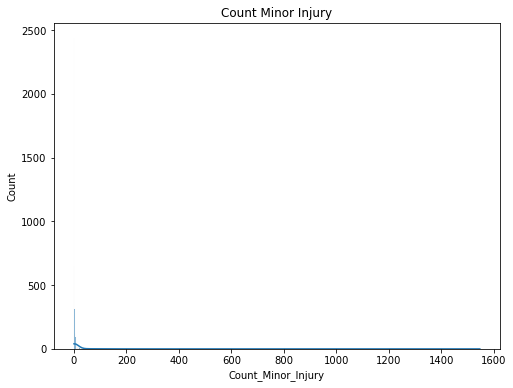

In [21]:
#Checking data of Count_Minor_Injury
plt.figure(figsize=(8,6))
sns.histplot(data=data['Count_Minor_Injury'],kde=True)
plt.title('Count Minor Injury')

In [22]:
data['Count_Minor_Injury'].median()

0.0

In [23]:
#Missing values will be replaced by 0.0
data['Count_Minor_Injury']=data['Count_Minor_Injury'].fillna(value=0)

In [24]:
#Checking Null values in dataset
data.isna().sum()

Year                       0
Police_Region              0
Severity                   0
Drink_Driving              0
Driver_Speed               0
Fatigued_Driver            0
Defective_Vehicle          0
Count_Crashes              0
Count_Fatality             0
Count_Hospitalised         0
Count_Medically_Treated    0
Count_Minor_Injury         0
dtype: int64

In [25]:
# All null values are handled

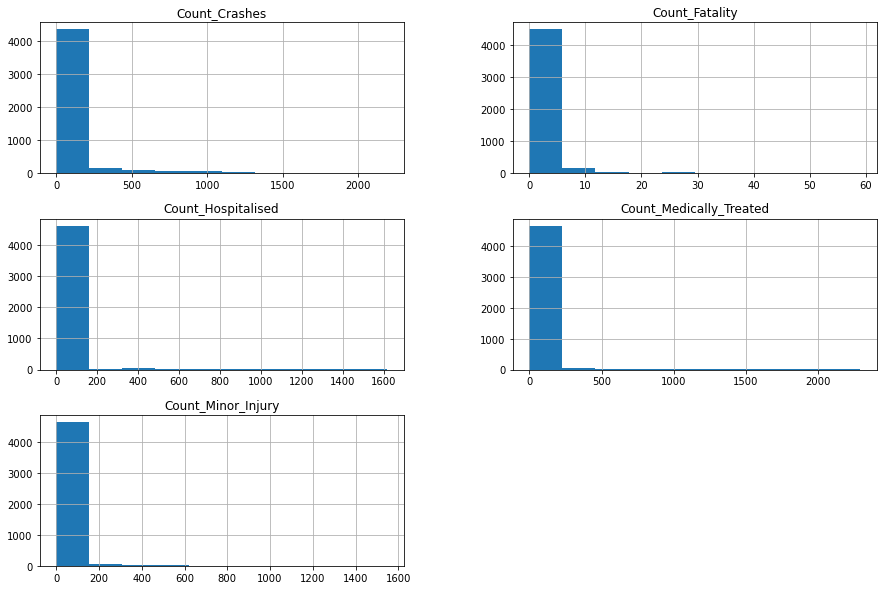

In [26]:
freq=data[['Count_Crashes', 'Count_Fatality', 'Count_Hospitalised', 'Count_Medically_Treated', 'Count_Minor_Injury']]
freq.hist(figsize=(15,10))
plt.show()

In [27]:
data.columns

Index(['Year', 'Police_Region', 'Severity', 'Drink_Driving', 'Driver_Speed',
       'Fatigued_Driver', 'Defective_Vehicle', 'Count_Crashes',
       'Count_Fatality', 'Count_Hospitalised', 'Count_Medically_Treated',
       'Count_Minor_Injury'],
      dtype='object')

In [28]:
data.head()

,Year,Police_Region,Severity,Drink_Driving,Driver_Speed,Fatigued_Driver,Defective_Vehicle,Count_Crashes,Count_Fatality,Count_Hospitalised,Count_Medically_Treated,Count_Minor_Injury
0,2001,Brisbane,5,0.0,0.0,0.0,0.0,25,25,6,4,2.0
1,2001,Brisbane,5,0.0,0.0,0.0,1.0,1,1,0,0,0.0
2,2001,Brisbane,5,0.0,1.0,0.0,0.0,8,8,5,0,0.0
3,2001,Brisbane,5,1.0,0.0,0.0,0.0,2,2,0,0,0.0
4,2001,Brisbane,5,1.0,0.0,0.0,1.0,1,1,3,0,0.0


<AxesSubplot:>

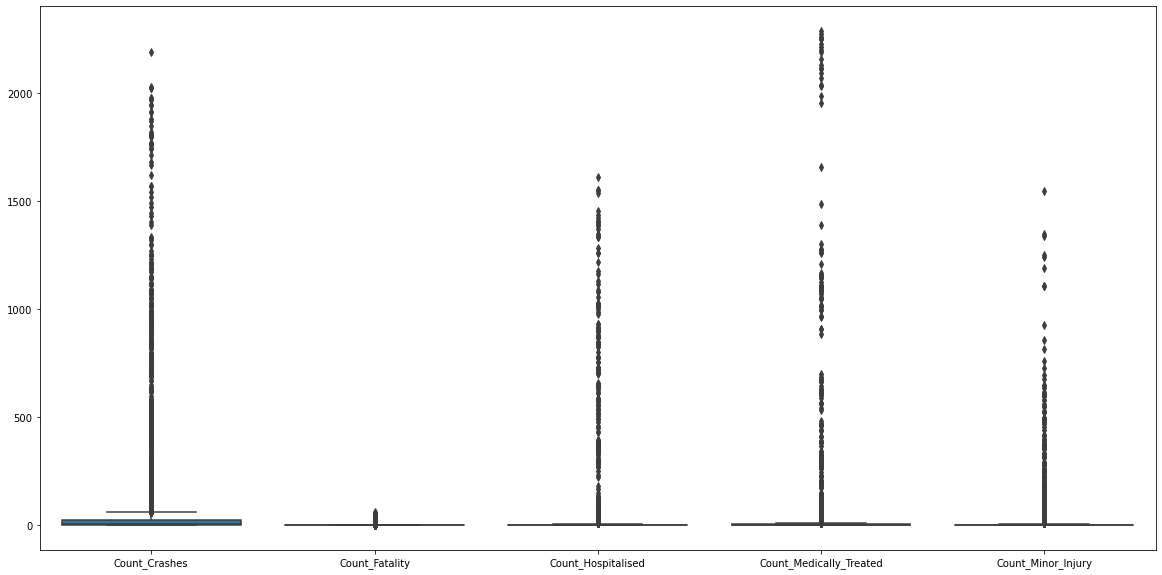

In [29]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data[['Count_Crashes',
       'Count_Fatality', 'Count_Hospitalised', 'Count_Medically_Treated',
       'Count_Minor_Injury']])

In [30]:
#Checking outlier of Count_crashes
Q1=np.percentile(data['Count_Crashes'],25)
Q3=np.percentile(data['Count_Crashes'],75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
print('Quartile 1:',Q1)
print('Quartile 3:',Q3)
print('Inter Quartile Range(IQR):',IQR)
print('Lower Limit:',LL)
print('Upper Limit:',UL)

Quartile 1: 2.0
Quartile 3: 25.0
Inter Quartile Range(IQR): 23.0
Lower Limit: -32.5
Upper Limit: 59.5


In [31]:
data[ (data['Count_Crashes']>UL)]

,Year,Police_Region,Severity,Drink_Driving,Driver_Speed,Fatigued_Driver,Defective_Vehicle,Count_Crashes,Count_Fatality,Count_Hospitalised,Count_Medically_Treated,Count_Minor_Injury
6,2001,Brisbane,3,0.0,0.0,0.0,0.0,978,0,1116,101,69.0
12,2001,Brisbane,3,1.0,0.0,0.0,0.0,66,0,86,13,2.0
16,2001,Brisbane,4,0.0,0.0,0.0,0.0,1946,0,0,2289,129.0
24,2001,Brisbane,2,0.0,0.0,0.0,0.0,1299,0,0,0,1547.0
34,2001,Brisbane,1,0.0,0.0,0.0,0.0,2023,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4742,2021,South Eastern,4,0.0,0.0,0.0,0.0,547,0,0,632,55.0
4748,2021,South Eastern,2,0.0,0.0,0.0,0.0,238,0,0,0,287.0
4757,2021,Southern,3,0.0,0.0,0.0,0.0,354,0,432,32,37.0
4765,2021,Southern,4,0.0,0.0,0.0,0.0,228,0,0,285,20.0


In [32]:
data['Count_Crashes'].value_counts()

1      967
2      434
3      292
4      236
5      185
      ... 
330      1
491      1
126      1
839      1
354      1
Name: Count_Crashes, Length: 492, dtype: int64

In [33]:
#fitting outlier with UL value
index=data.loc[(data['Count_Crashes']>UL)].index
index

Int64Index([   6,   12,   16,   24,   34,   37,   41,   50,   58,   65,
            ...
            4703, 4714, 4720, 4733, 4737, 4742, 4748, 4757, 4765, 4771],
           dtype='int64', length=648)

In [34]:
data.loc[index,'Count_Crashes']=59
#checking outlier again
data[ (data['Count_Crashes']>UL)]

,Year,Police_Region,Severity,Drink_Driving,Driver_Speed,Fatigued_Driver,Defective_Vehicle,Count_Crashes,Count_Fatality,Count_Hospitalised,Count_Medically_Treated,Count_Minor_Injury


In [35]:
#Checking outlier for Count_Fatality
Q1=np.percentile(data['Count_Fatality'],25)
Q3=np.percentile(data['Count_Fatality'],75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
print('Quartile 1:',Q1)
print('Quartile 3:',Q3)
print('Inter Quartile Range(IQR):',IQR)
print('Lower Limit:',LL)
print('Upper Limit:',UL)

Quartile 1: 0.0
Quartile 3: 0.0
Inter Quartile Range(IQR): 0.0
Lower Limit: 0.0
Upper Limit: 0.0


In [36]:
data['Count_Fatality'].value_counts()

0     3966
1      205
2      124
3       73
4       64
5       48
6       44
7       39
8       29
10      19
11      18
9       13
14      10
12       9
17       9
13       8
16       7
25       7
26       6
28       5
41       4
24       4
32       4
27       4
21       4
29       4
38       4
20       4
34       3
15       3
23       3
22       3
35       3
18       3
19       2
37       2
31       2
36       2
40       2
48       2
45       2
53       1
44       1
39       1
59       1
57       1
43       1
47       1
33       1
46       1
30       1
Name: Count_Fatality, dtype: int64

In [37]:
# Since 3966 value is 0 will convert this Variable to nominal by making rest of values as 1
data['Count_Fatality']=data['Count_Fatality'].where(data['Count_Fatality']==0,1)

In [38]:
data['Count_Fatality'].value_counts()
#all values other than zeroes are replaces with 1

0    3966
1     811
Name: Count_Fatality, dtype: int64

In [39]:
#Checking outlier for Count_Hospitalised
Q1=np.percentile(data['Count_Hospitalised'],25)
Q3=np.percentile(data['Count_Hospitalised'],75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
print('Quartile 1:',Q1)
print('Quartile 3:',Q3)
print('Inter Quartile Range(IQR):',IQR)
print('Lower Limit:',LL)
print('Upper Limit:',UL)

Quartile 1: 0.0
Quartile 3: 3.0
Inter Quartile Range(IQR): 3.0
Lower Limit: -4.5
Upper Limit: 7.5


In [40]:
data['Count_Hospitalised'].value_counts()

0       2971
1        340
2        183
3        132
4         84
        ... 
505        1
56         1
384        1
1021       1
85         1
Name: Count_Hospitalised, Length: 249, dtype: int64

In [41]:
#We will fit extreme values with UL value. Since this is count we will take whole number only 7
index=data.loc[(data['Count_Hospitalised']>UL)].index
index

Int64Index([   6,    7,    8,    9,   12,   15,   44,   50,   51,   52,
            ...
            4735, 4736, 4737, 4740, 4753, 4757, 4758, 4759, 4760, 4761],
           dtype='int64', length=934)

In [42]:
data.loc[index,'Count_Hospitalised']=7
#checking outlier again
data[ (data['Count_Hospitalised']>UL)]

,Year,Police_Region,Severity,Drink_Driving,Driver_Speed,Fatigued_Driver,Defective_Vehicle,Count_Crashes,Count_Fatality,Count_Hospitalised,Count_Medically_Treated,Count_Minor_Injury


In [43]:
#Checking outlier for Count_Medically_Treated
Q1=np.percentile(data['Count_Medically_Treated'],25)
Q3=np.percentile(data['Count_Medically_Treated'],75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
print('Quartile 1:',Q1)
print('Quartile 3:',Q3)
print('Inter Quartile Range(IQR):',IQR)
print('Lower Limit:',LL)
print('Upper Limit:',UL)

Quartile 1: 0.0
Quartile 3: 4.0
Inter Quartile Range(IQR): 4.0
Lower Limit: -6.0
Upper Limit: 10.0


In [44]:
data['Count_Medically_Treated'].value_counts()

0       2560
1        460
2        266
3        180
4        128
        ... 
2160       1
337        1
126        1
1102       1
533        1
Name: Count_Medically_Treated, Length: 255, dtype: int64

In [45]:
#We will fit extreme values with UL value. 
index=data.loc[(data['Count_Medically_Treated']>UL)].index
index

Int64Index([   6,   12,   16,   17,   19,   21,   23,   50,   58,   59,
            ...
            4700, 4714, 4720, 4733, 4742, 4745, 4757, 4765, 4768, 4769],
           dtype='int64', length=790)

In [46]:
data.loc[index,'Count_Medically_Treated']=UL
#checking outlier again
data[ (data['Count_Medically_Treated']>UL)]

,Year,Police_Region,Severity,Drink_Driving,Driver_Speed,Fatigued_Driver,Defective_Vehicle,Count_Crashes,Count_Fatality,Count_Hospitalised,Count_Medically_Treated,Count_Minor_Injury


In [47]:
#Checking outlier for Count_Minor_Injury
Q1=np.percentile(data['Count_Minor_Injury'],25)
Q3=np.percentile(data['Count_Minor_Injury'],75)
IQR=Q3-Q1
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
print('Quartile 1:',Q1)
print('Quartile 3:',Q3)
print('Inter Quartile Range(IQR):',IQR)
print('Lower Limit:',LL)
print('Upper Limit:',UL)

Quartile 1: 0.0
Quartile 3: 3.0
Inter Quartile Range(IQR): 3.0
Lower Limit: -4.5
Upper Limit: 7.5


In [48]:
#We will fit extreme values with UL value. Since this is count we will take whole number only 7
index=data.loc[(data['Count_Minor_Injury']>UL)].index
index

Int64Index([   6,    9,   16,   24,   25,   27,   29,   58,   65,   67,
            ...
            4714, 4720, 4725, 4733, 4742, 4748, 4752, 4757, 4765, 4771],
           dtype='int64', length=744)

In [49]:
data.loc[index,'Count_Minor_Injury']=UL
#checking outlier again
data[ (data['Count_Minor_Injury']>UL)]

,Year,Police_Region,Severity,Drink_Driving,Driver_Speed,Fatigued_Driver,Defective_Vehicle,Count_Crashes,Count_Fatality,Count_Hospitalised,Count_Medically_Treated,Count_Minor_Injury


<AxesSubplot:>

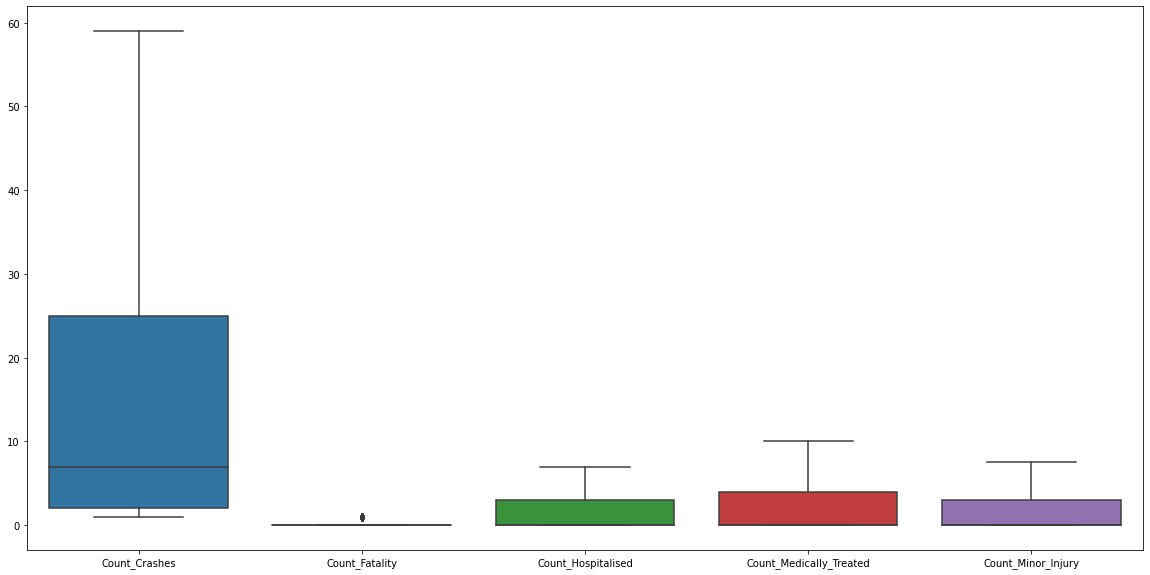

In [50]:
#Checking Dataset Outliers again
plt.figure(figsize=(20,10))
sns.boxplot(data=data[['Count_Crashes',
       'Count_Fatality', 'Count_Hospitalised', 'Count_Medically_Treated',
       'Count_Minor_Injury']])

<AxesSubplot:>

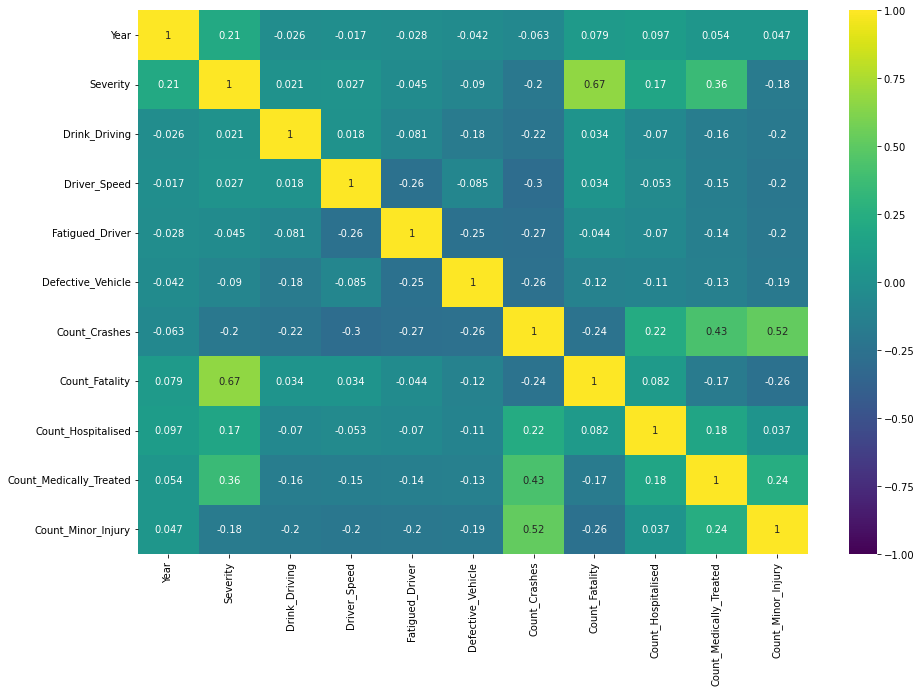

In [51]:
#checking correlation
plt.figure(figsize=(15,10))
sns.heatmap(data=data.corr(),annot=True,vmin=-1,vmax=1,cmap='viridis')

#### As per heatmap there is very low linear correlation between variables. As expected there is a positive correlation between accident severity and fatality

In [52]:
data.head()

,Year,Police_Region,Severity,Drink_Driving,Driver_Speed,Fatigued_Driver,Defective_Vehicle,Count_Crashes,Count_Fatality,Count_Hospitalised,Count_Medically_Treated,Count_Minor_Injury
0,2001,Brisbane,5,0.0,0.0,0.0,0.0,25,1,6,4,2.0
1,2001,Brisbane,5,0.0,0.0,0.0,1.0,1,1,0,0,0.0
2,2001,Brisbane,5,0.0,1.0,0.0,0.0,8,1,5,0,0.0
3,2001,Brisbane,5,1.0,0.0,0.0,0.0,2,1,0,0,0.0
4,2001,Brisbane,5,1.0,0.0,0.0,1.0,1,1,3,0,0.0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4777 entries, 0 to 4776
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4777 non-null   int64  
 1   Police_Region            4777 non-null   object 
 2   Severity                 4777 non-null   int64  
 3   Drink_Driving            4777 non-null   float64
 4   Driver_Speed             4777 non-null   float64
 5   Fatigued_Driver          4777 non-null   float64
 6   Defective_Vehicle        4777 non-null   float64
 7   Count_Crashes            4777 non-null   int64  
 8   Count_Fatality           4777 non-null   int64  
 9   Count_Hospitalised       4777 non-null   int64  
 10  Count_Medically_Treated  4777 non-null   int64  
 11  Count_Minor_Injury       4777 non-null   float64
dtypes: float64(5), int64(6), object(1)
memory usage: 448.0+ KB


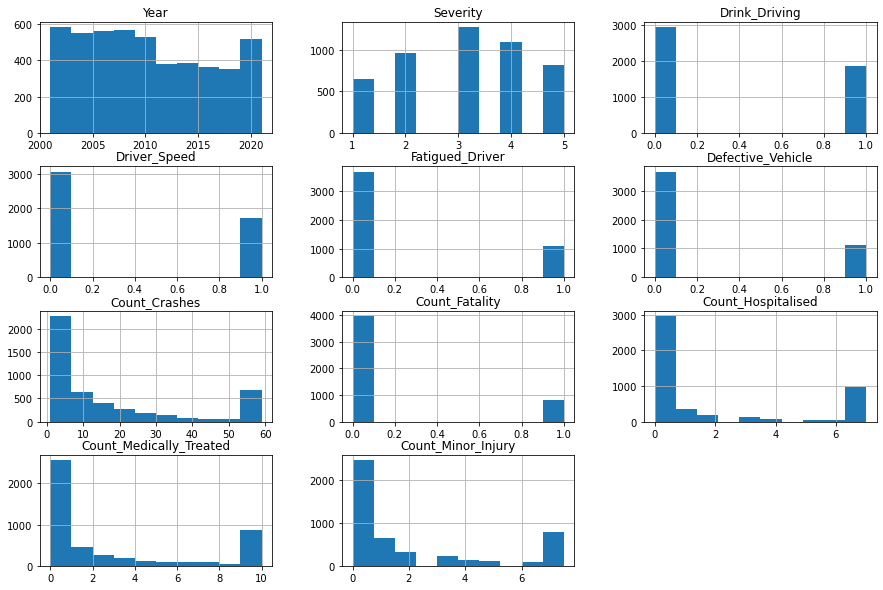

In [54]:
freq=data.select_dtypes('number')
freq.hist(figsize=(15,10))
plt.show()

# Normalisation

In [55]:
data.head()

,Year,Police_Region,Severity,Drink_Driving,Driver_Speed,Fatigued_Driver,Defective_Vehicle,Count_Crashes,Count_Fatality,Count_Hospitalised,Count_Medically_Treated,Count_Minor_Injury
0,2001,Brisbane,5,0.0,0.0,0.0,0.0,25,1,6,4,2.0
1,2001,Brisbane,5,0.0,0.0,0.0,1.0,1,1,0,0,0.0
2,2001,Brisbane,5,0.0,1.0,0.0,0.0,8,1,5,0,0.0
3,2001,Brisbane,5,1.0,0.0,0.0,0.0,2,1,0,0,0.0
4,2001,Brisbane,5,1.0,0.0,0.0,1.0,1,1,3,0,0.0


In [56]:
data1=data.drop(['Year','Police_Region'],axis=1)

In [57]:
data1

,Severity,Drink_Driving,Driver_Speed,Fatigued_Driver,Defective_Vehicle,Count_Crashes,Count_Fatality,Count_Hospitalised,Count_Medically_Treated,Count_Minor_Injury
0,5,0.0,0.0,0.0,0.0,25,1,6,4,2.0
1,5,0.0,0.0,0.0,1.0,1,1,0,0,0.0
2,5,0.0,1.0,0.0,0.0,8,1,5,0,0.0
3,5,1.0,0.0,0.0,0.0,2,1,0,0,0.0
4,5,1.0,0.0,0.0,1.0,1,1,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...
4772,2,0.0,0.0,0.0,1.0,1,0,0,0,1.0
4773,2,0.0,0.0,1.0,0.0,2,0,0,0,2.0
4774,2,0.0,1.0,0.0,0.0,5,0,0,0,7.0
4775,2,0.0,1.0,1.0,0.0,1,0,0,0,1.0


In [58]:
#data1_norm = (data1-data1.min()) / (data1.max()-data1.min())
from sklearn import preprocessing
x = data1 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_data1= pd.DataFrame(x_scaled)

In [59]:
normalized_data1

,0,1,2,3,4,5,6,7,8,9
0,1.00,0.0,0.0,0.0,0.0,0.413793,1.0,0.857143,0.4,0.266667
1,1.00,0.0,0.0,0.0,1.0,0.000000,1.0,0.000000,0.0,0.000000
2,1.00,0.0,1.0,0.0,0.0,0.120690,1.0,0.714286,0.0,0.000000
3,1.00,1.0,0.0,0.0,0.0,0.017241,1.0,0.000000,0.0,0.000000
4,1.00,1.0,0.0,0.0,1.0,0.000000,1.0,0.428571,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
4772,0.25,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.133333
4773,0.25,0.0,0.0,1.0,0.0,0.017241,0.0,0.000000,0.0,0.266667
4774,0.25,0.0,1.0,0.0,0.0,0.068966,0.0,0.000000,0.0,0.933333
4775,0.25,0.0,1.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.133333


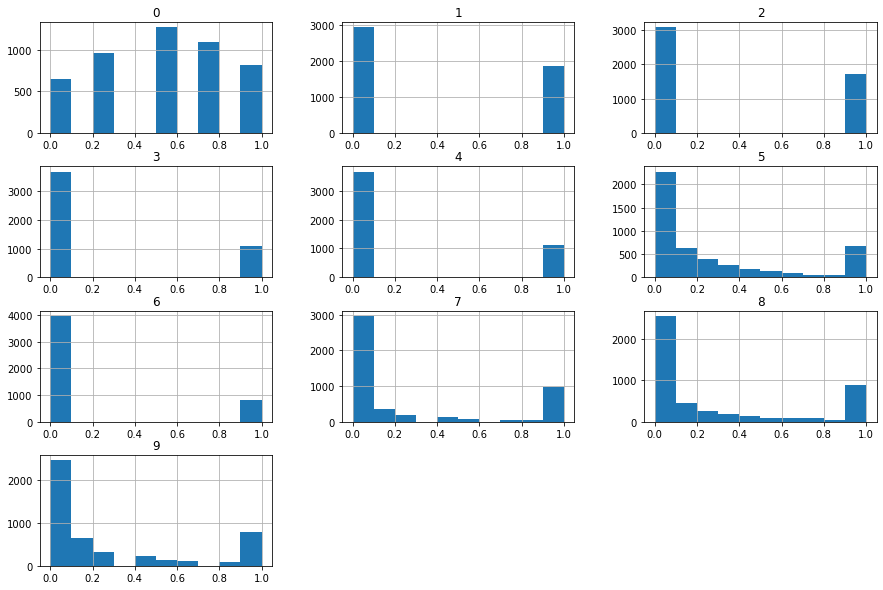

In [60]:

normalized_data1.hist(figsize=(15,10))
plt.show()

As seen above normalisation is not changing the data distribution. Also since the data is count only we dont need to apply standardisation

# Exploratory Analysis of Data

# Univariate Analysis

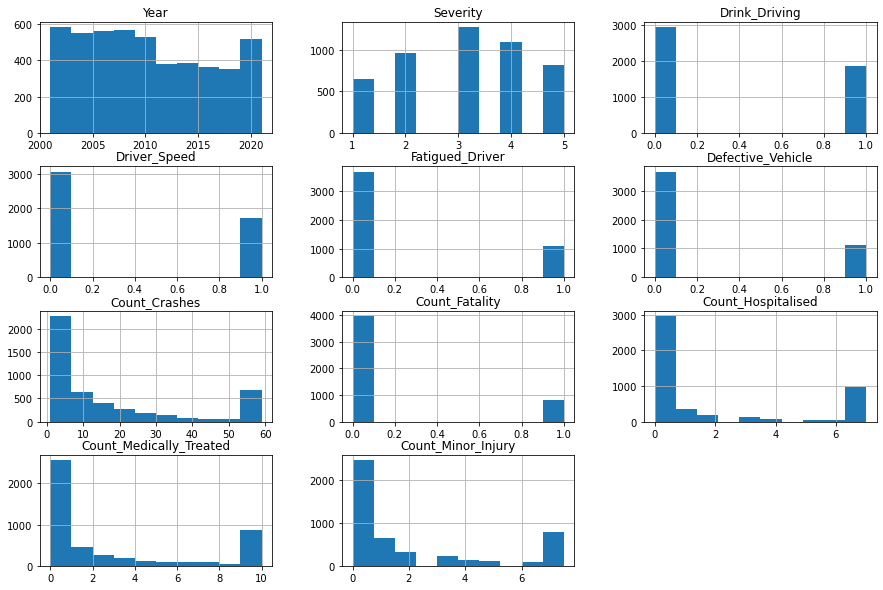

In [61]:
freq=data.select_dtypes('number')
freq.hist(figsize=(15,10))
plt.show()

Fatigued_Driver,Drink_Driving,Driver_Speed,Defective_Vehicle,Count_fatality follows nominal values of True or False(1 ,0)

Severity ,Count_Crashes,Count_Hospitalised,Count_Medically_treated,Count_Minor_Injury are discrete variables

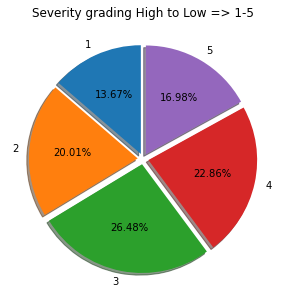

In [62]:
#Composition of Severity
sev=data1.groupby('Severity').Severity.count()
sev.plot.pie(y='Severity', figsize=(5, 5),autopct='%1.2f%%',title='Severity grading High to Low => 1-5',
                       ylabel='',explode=(0.05, 0.05, 0.05,0.05,0.05),shadow=True, startangle=90)
plt.show()

As per analysis Severity 3 is having highest percentage of 26.48%

In [63]:
yrdat=data.groupby('Year')['Severity'].count()
yrdat

Year
2001    288
2002    292
2003    276
2004    272
2005    274
2006    285
2007    291
2008    277
2009    265
2010    261
2011    186
2012    193
2013    196
2014    189
2015    189
2016    175
2017    178
2018    172
2019    177
2020    177
2021    164
Name: Severity, dtype: int64

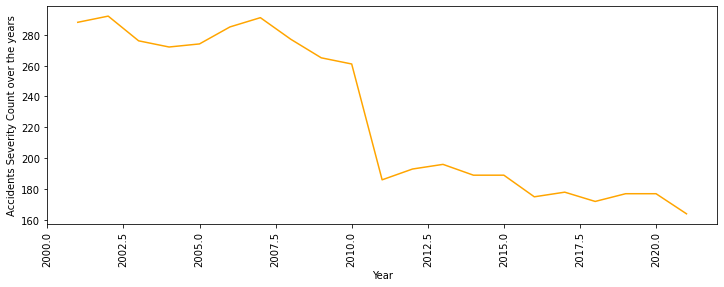

In [64]:
fig= plt.subplots(figsize=(12,4))
plt.xticks(rotation=90)
ax=sns.lineplot(data=yrdat,markers=True,color='orange')
ax.set(ylabel='Accidents Severity Count over the years' )
plt.show()

As per the plot we can see the Accidents is reducing over the year

# Bivariate Analysis

Text(0.5, 1.0, 'ROAD ACCIDENT COUNT BY REGION')

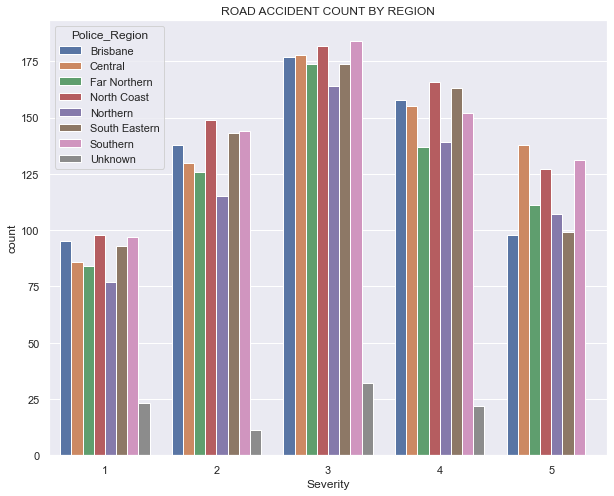

In [65]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x='Severity',hue='Police_Region',data=grdat)
plt.title("ROAD ACCIDENT COUNT BY REGION")

<AxesSubplot:>

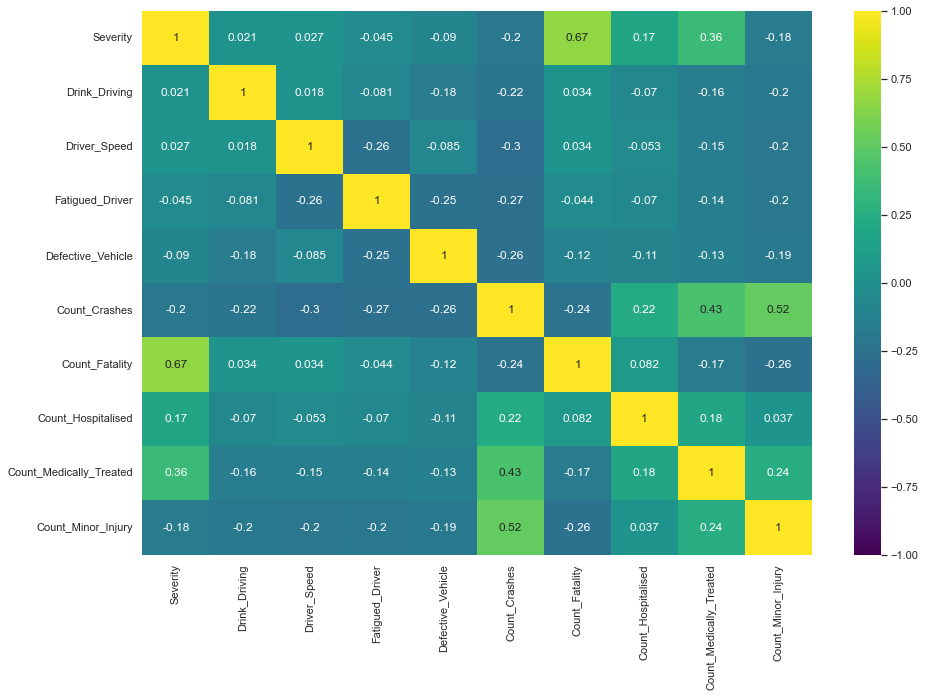

In [66]:
#Checking Correlation
plt.figure(figsize=(15,10))
sns.heatmap(data=data1.corr(),annot=True,vmin=-1,vmax=1,cmap='viridis')

As per the heatmap there is a positive correlation between Severity and Count_Fatality

# Modelling

### Splitting data to train and test data

In [67]:
X= data1.drop(['Severity'],axis=1)
y=data1['Severity']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### KNN Classifier Model

In [69]:
acc_values=[]
neighbors=np.arange(3,20)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
print(acc_values) 

[0.9539748953974896, 0.9525801952580195, 0.9518828451882845, 0.9532775453277545, 0.9595536959553695, 0.9553695955369595, 0.9518828451882845, 0.9525801952580195, 0.9518828451882845, 0.9490934449093444, 0.9504881450488145, 0.9483960948396095, 0.9483960948396095, 0.9463040446304045, 0.9476987447698745, 0.9442119944211994, 0.9449093444909344]


Text(0, 0.5, 'accuracy')

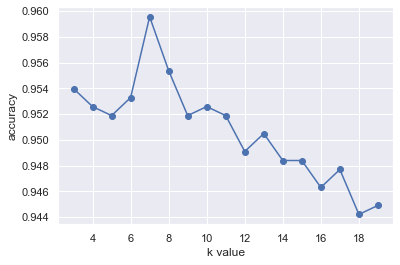

In [70]:
plt.figure(figsize=(6,4))
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [71]:
#Accuracy is  95% for k=7. So we will try with k=7
classifier= KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(X_train,y_train) 
y_pred=classifier.predict(X_test)
print('Accuracy Score:',format(accuracy_score(y_test,y_pred)*100,'1.2f'))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

Accuracy Score: 95.40
Confusion Matrix
 [[182   0   0   0   3]
 [  1 279   0   0   1]
 [  0   3 389   3  11]
 [  0   1   0 324   0]
 [  6   0  31   6 194]]
 Classification Report
               precision    recall  f1-score   support

           1       0.96      0.98      0.97       185
           2       0.99      0.99      0.99       281
           3       0.93      0.96      0.94       406
           4       0.97      1.00      0.98       325
           5       0.93      0.82      0.87       237

    accuracy                           0.95      1434
   macro avg       0.96      0.95      0.95      1434
weighted avg       0.95      0.95      0.95      1434



### Logistic Regression Model

In [72]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('Accuracy Score',format(accuracy_score(y_test,y_pred)*100,'1.2f'))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

Accuracy Score 99.44
Confusion Matrix
 [[185   0   0   0   0]
 [  2 279   0   0   0]
 [  0   1 405   0   0]
 [  0   2   0 323   0]
 [  0   0   0   3 234]]
 Classification Report
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       185
           2       0.99      0.99      0.99       281
           3       1.00      1.00      1.00       406
           4       0.99      0.99      0.99       325
           5       1.00      0.99      0.99       237

    accuracy                           0.99      1434
   macro avg       0.99      0.99      0.99      1434
weighted avg       0.99      0.99      0.99      1434



### Random Forest Model

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy Score:',format(accuracy_score(y_test,y_pred)*100,'1.2f'))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))

Accuracy Score: 99.86
Confusion Matrix
 [[185   0   0   0   0]
 [  2 279   0   0   0]
 [  0   0 406   0   0]
 [  0   0   0 325   0]
 [  0   0   0   0 237]]
 Classification Report
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       185
           2       1.00      0.99      1.00       281
           3       1.00      1.00      1.00       406
           4       1.00      1.00      1.00       325
           5       1.00      1.00      1.00       237

    accuracy                           1.00      1434
   macro avg       1.00      1.00      1.00      1434
weighted avg       1.00      1.00      1.00      1434



## As per above modelling Random Forest is giving highest accuracy of 99.86 with f1 score of 99%

### Fine Tuning Random Forest Model

In [74]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [75]:
#using gridsearchCV
from sklearn.model_selection import GridSearchCV

In [76]:
#define the grid
param_grid= {
    'n_estimators':[50,100,150,200,300],
    'min_samples_leaf':[1,3,5,10],
    'max_depth':[2,4,6,8,10],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False]
    
}
#Creating GridSearchCV instance
rf_gridsearch=GridSearchCV(
estimator=clf,
param_grid=param_grid,
n_jobs=4,
cv=5,
refit=True,
return_train_score=True
)

In [77]:
#fitting model
rf_gridsearch.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 300]},
             return_train_score=True)

In [83]:
# Identifying best parameter
rf_gridsearch.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [84]:
#predicting using best parameter
cfl1=RandomForestClassifier(bootstrap=True,max_depth=2,max_features='auto',min_samples_leaf=1,n_estimators=100)
cfl1.fit(X_train,y_train)

RandomForestClassifier(max_depth=2)

In [85]:
y_pred_grid=cfl1.predict(X_test)

In [86]:
print('Accuracy Score:',format(accuracy_score(y_test,y_pred_grid)*100,'1.2f'))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred_grid))
print(' Classification Report\n',classification_report(y_test,y_pred_grid))

Accuracy Score: 99.86
Confusion Matrix
 [[185   0   0   0   0]
 [  2 279   0   0   0]
 [  0   0 406   0   0]
 [  0   0   0 325   0]
 [  0   0   0   0 237]]
 Classification Report
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       185
           2       1.00      0.99      1.00       281
           3       1.00      1.00      1.00       406
           4       1.00      1.00      1.00       325
           5       1.00      1.00      1.00       237

    accuracy                           1.00      1434
   macro avg       1.00      1.00      1.00      1434
weighted avg       1.00      1.00      1.00      1434



### Accuracy we are having is good and model tuning is giving same accuracy itself